In [90]:
# Assigment 2
# Comparison of the exponential and running mean for random walk model

# Team 6: Berman Vladimir, Dronova Maria, Bazhenov Artem, Skoltech, October, 2022

# Initialisation of libraries 
import numpy as np
import matplotlib.pyplot as plt

In [91]:
#PART 1. Determination of optimal smoothing constant in exponential mean.
# setting the function for exponential smoothing
def exp_smooth(alp, arr):
    dub = np.array(arr)
    for i in range(1, len(arr)):
        dub[i] = dub[i - 1] + alp * (dub[i] - dub[i - 1])
    return dub

In [92]:
# setting the function for running mean
def mean_smooth(wind, arr):
    dub = np.array(arr)
    for i in range((wind -1) // 2 , len(dub) - (wind - 1) // 2):
        dub[i] = np.mean(dub[i - (wind - 1) // 2 : i + (wind - 1) // 2])
    return dub

In [93]:
x0 = 10 # initial condition

var1 = 13 # variance of unbiased random noise 
sigma1 = 13 ** 0.5 # standard deviation of unbiased random noise 

# setting size of true trajectories in points
x1 = np.ones(300) 
x2 = np.ones(3000)

# generation of normal noise for two trajectories of different size
w1 = np.random.normal(0, sigma1, 300)
w2 = np.random.normal(0, sigma1, 3000)

# generation of true trajectory of 300 points
x1[0] = x0 + w1[0]
for i in range(1,300):
    x1[i] = x1[i - 1] + w1[i]

# generation of true trajectory of 3000 points
x2[0] = x0 + w2[0]
for i in range(1,3000):
    x2[i] = x2[i - 1] + w2[i]

In [94]:
var2 = 8 # variance of measurement noise
sigma2 = var2 ** 0.5  # standard deviation of measurement noise

# genration of normal noise for two sets of measurements
eta1 = np.random.normal(0, sigma2, 300)
eta2 = np.random.normal(0, sigma2, 3000)

# setting amount of measurements
z1 = np.ones(300)
z2 = np.ones(3000)

# genration of 300 measurements
z1[0] = x1[0] + eta1[0]
for i in range(1,300):
    z1[i] = z1[i - 1] + eta1[i]

# genration of 3000 measurements
z2[0] = x2[0] + eta2[0]
for i in range(1,3000):
    z2[i] = z2[i - 1] + eta2[i]

In [95]:
# Setting size of residual nu
v1 = np.zeros(300)
v2 = np.zeros(3000)

# Setting size of residual rho
ro1 = np.zeros(300)
ro2 = np.zeros(3000)

# Calculating residual nu and rho
for i in range(1,300):
    v1[i] = w1[i] + eta1[i] - eta1[i - 1]
for i in range(2,300):
    ro1[i] = w1[i] + w1[i - 1] + eta1[i] - eta1[i - 2]

for i in range(1,3000):
    v2[i] = w2[i] + eta2[i] - eta2[i - 1]
for i in range(2,3000):
    ro2[i] = w2[i] + w2[i - 1] + eta2[i] - eta2[i - 2]

In [96]:
# Expectations for 300 points
Ev1 = np.std(v1[1:len(v1) - 1]) ** 2
Ero1 = np.std(ro1[2:len(ro1) - 1]) ** 2

# Expectations for 3000 points
Ev2 = np.std(v2[1:len(v2) - 1]) ** 2
Ero2 = np.std(ro2[1:len(ro2) - 1]) ** 2

In [97]:
# Setting array with expectations
E1 = np.array([Ev1, Ero1])
E2 = np.array([Ev2, Ero2])

In [98]:
coefs = (np.array([[1, 2], [2, 2]]))

sigma1_2 = np.dot(np.linalg.inv(coefs), E1) # calculating column of sigma squared for 300 points
sigma2_2 = np.dot(np.linalg.inv(coefs), E2) # calculating column of sigma squared for 3000 points

sigma = np.array([sigma1_2, sigma2_2])
sigma1_2 = sigma[:, 0] # variance for unbiased random noise for both 300 and 3000 points
sigma2_2 = sigma[:, 1] # variance for measurement noise both 300 and 3000 points

In [99]:
print('Calculated variance for unbiased random noise for 300 and 3000 points =', sigma1_2)
print('Calculated variance for measurement noise for 300 and 3000 points =', sigma2_2)

Calculated variance for unbiased random noise for 300 and 3000 points = [10.34220767 14.19936332]
Calculated variance for measurement noise for 300 and 3000 points = [9.33253913 7.15168768]


In [100]:
# Comparing  estimation  results  with  true  values of variances in percent
est_var1 = abs((sigma1 - sigma1_2 ** 0.5) / sigma1) * 100 
est_var2 = abs((sigma2 - sigma2_2 ** 0.5) / sigma2) * 100
print('Difference between variance for unbiased random noise in percent for 300 and 3000 points =', est_var1)
print('Difference between variance for measurement noise in percent for 300 and 3000 points =', est_var2)

Difference between variance for unbiased random noise in percent for 300 and 3000 points = [10.80614169  4.51118203]
Difference between variance for measurement noise in percent for 300 and 3000 points = [8.00774929 5.45049125]


In [101]:
# Calculating optimal smoothing constant in exponential smoothing for 300 and 3000 ponts
hi1 = sigma1_2[0] / sigma2_2[0]
hi2 = sigma1_2[1] / sigma2_2[1]

alp1 = (-hi1 + np.sqrt(hi1 ** 2 + 4 * hi1)) / 2
alp2 = (-hi2 + np.sqrt(hi2 ** 2 + 4 * hi2)) / 2
print('Smoothing constant for 300 points =', alp1)
print('Smoothing constant for 3000 points =', alp2)

Smoothing constant for 300 points = 0.6355312153433359
Smoothing constant for 3000 points = 0.7309207347889671


Text(0.5, 1.0, 'Exponential smoothing for trajectory with 300 points')

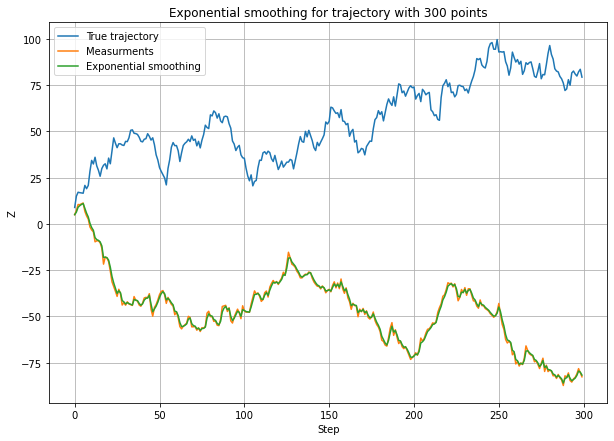

In [102]:
plt.figure(figsize=(10, 7))
plt.plot(x1)
plt.plot(z1)
plt.plot(exp_smooth(alp1, z1))
plt.grid()
plt.ylabel('Z')
plt.xlabel('Step')
plt.legend(['True trajectory', 'Measurments','Exponential smoothing'])
plt.title('Graph1\nExponential smoothing for trajectory with 300 points')

Text(0.5, 1.0, 'Exponential smoothing for trajectory with 3000 points')

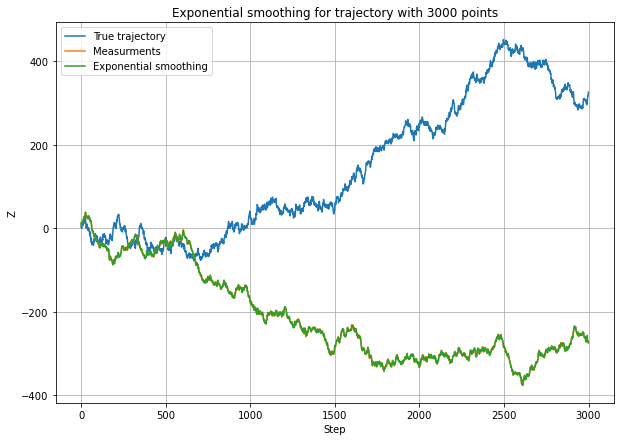

In [103]:
plt.figure(figsize=(10, 7))
plt.plot(x2)
plt.plot(z2)
plt.plot(exp_smooth(alp2, z2))
plt.grid()
plt.ylabel('Z')
plt.xlabel('Step')
plt.legend(['True trajectory', 'Measurments','Exponential smoothing'])
plt.title('Graph2\nExponential smoothing for trajectory with 3000 points')

In [ ]:
# Graph1 and Graph2 show that measurements differ a lot from true trajectory in both cases because of the measurement noise. 
# Exponential smoothing for trajectory of 3000 points is more abrupt due to the bigger smoothing contant (0,73 vs 0,63)

In [104]:
# PART 2. Comparison of methodical errors of exponential and running mean. 
x0 = 10 # initial condition

sigmaw_2 = 28 ** 2 # variance of unbiased random noise 
sigmaeta_2 = 97 ** 2 # variance of measurement noise 

# Settng size of trajectory
x = np.ones(300) 
z = np.ones(300)

# Genration of normal noise
w = np.random.normal(0, sigmaw_2 ** 0.5, 300)
eta = np.random.normal(0, sigmaeta_2 ** 0.5, 300) 

x[0] = x0 + w[0]
for i in range(1,300):
    x[i] = x[i - 1] + w[i]
z[0] = x[0] + eta[0]
for i in range(1,300):
    z[i] = z[i - 1] + eta[i]

In [105]:
# Calculating window size M and smoothing constant alpha
hi = sigmaw_2 / sigmaeta_2
alp = (-hi + np.sqrt(hi ** 2 + 4 * hi)) / 2
M = round((2 - alp) / alp)
print('Smoothing constant =', alp)
print('Window size =', M)

Smoothing constant = 0.24998861233121078
Window size = 7


Text(0.5, 1.0, 'Comparison of the exponential and running mean')

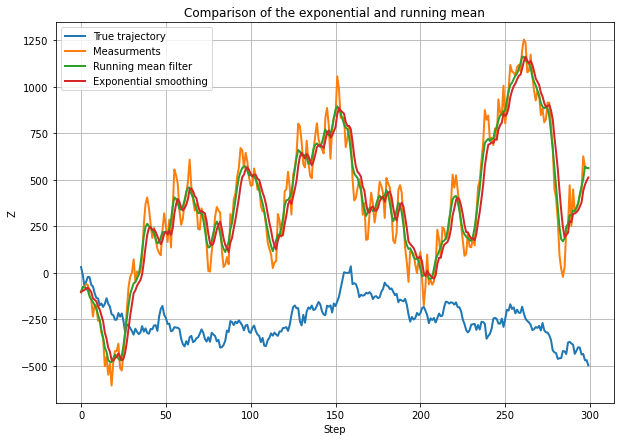

In [106]:
plt.figure(figsize=(10, 7))
plt.plot(x, linewidth = 2)
plt.plot(z, linewidth = 2)
plt.plot(mean_smooth(M, z), linewidth = 2)
plt.plot(exp_smooth(alp, z), linewidth = 2)
plt.grid()
plt.ylabel('Z')
plt.xlabel('Step')
plt.legend(['True trajectory', 'Measurments', 'Running mean filter', 'Exponential smoothing'])
plt.title('Graph3\nComparison of the exponential and running mean')

In [109]:
# Comparison of results
print('Standard deviation for running mean =', np.std(z - mean_smooth(M, z)))
print('Standard deviation for exponential smoothing =', np.std(z - exp_smooth(alp, z)))

Standard deviation for running mean = 73.783487170732
Standard deviation for exponential smoothing = 111.21640843517777


In [ ]:
# Graph3 shows that measurements, again, differ a lot from the true trajectory due to sufficient measurement noise. 
# Also we can see that for this size of trajectory (300 point) standard deviation for running mean
# is 37.433 points lower that the one for exponential smoothing. 
# The graph for exponential smoothing is delayed and smoothes measurements quite a lot. However, this method 
# could be more suitable for different size of trajectory or for different purpose. For example, when we need 
# to evaluate the overall pattern of the trajectory and to get rid of noise as much as possible. But if it is the 
# accuracy that is needed than it would be logical to apply running mean for this size of trajectory. 

# Artem was sorting out the theory of quasi-optimal estimation methods
# Vladimir was dealing with converting calculations to the code according to the theory 
# All of the people in the team were discussing comments to the graphs and conclusion
# Maria was drawing up a report